<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">
# Classification Evaluation Lab
Week 4 | Lab 1.4
***

The goal of our first classifcation evaluation lab is to understand working with the common tools and methods we use when we evaluate prediction in terms of classification.  Also, we will explore the possibility of engineering features with continious variables, that can be used for classifcation.

In [2]:
import pandas as pd, numpy as np

%matplotlib inline

## Load the "Sacramento Realestate Transactions" housing dataset

In [4]:
df = pd.read_csv("/Users/ryandunlap/Desktop/DSI-SF-2/datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv")
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 1. Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

In [5]:
df['Expensive'] = df['price'].map(lambda x: 1 if x> 200000 else 0)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Expensive
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0


### 2. Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator / response variable.

Use patsy for this please!

In [13]:
import patsy

formula = 'Expensive ~ beds + baths + sq__ft'

y,X = patsy.dmatrices(formula,df,return_type='dataframe')

### 3. Load your design matrix.  Split your data into training and testing sets.  Setup KNN.

The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable you just created. Make the test size 33% (and optionally stratify).

> _Research the stratify parameter.  Why could this be important?_

In [35]:
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn import grid_search
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, np.ravel(y), test_size = 0.33, stratify=y)

In [36]:
knn = KNeighborsClassifier()
model = knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
score = knn.score(X_test,y_test)

print score

0.726993865031


### 4. Print out the confusion matrix
What do these mean?

In [37]:
cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['predicted is cheap','predicted is expensive'],
                 index = ['actual is cheap','actual is expensive'])
cm

,predicted is cheap,predicted is expensive
actual is cheap,115,33
actual is expensive,56,122


### 5. Change the response threshold (price) for your target.

Currently, you should be encoding a binary price variable based on prices > 200.  How does adjusting that threashold affect the false positive rate of your prediction?  Print out your confusion matrix.

In [39]:
df['Expensive_3'] = df['price'].map(lambda x: 1 if x> 300000 else 0)

formula3 = 'Expensive_3 ~ beds + baths + sq__ft'

y3,X3 = patsy.dmatrices(formula3,df,return_type='dataframe')

X_train3, X_test3, y_train3, y_test3 = cross_validation.train_test_split(X3, np.ravel(y3), test_size = 0.33, stratify=y)

knn3 = KNeighborsClassifier()
model3 = knn3.fit(X_train,y_train)
predictions3 = knn3.predict(X_test)
score3 = knn3.score(X_test,y_test)

print score3
cm3 = pd.DataFrame(confusion_matrix(y_test3, predictions3), columns=['predicted is cheap','predicted is expensive'],
                 index = ['actual is cheap','actual is expensive'])
cm3

0.726993865031


,predicted is cheap,predicted is expensive
actual is cheap,135,123
actual is expensive,36,32


### 6. Plot your confusion matrix metrics through a range of K from 1-10.
Iterate through a list of numbers containing a range of N from 1-10.  Plot your false positive rate.

> **Optionally** Plot the scores from the rest of the confusion matrix and plot their values, _true_positives, false_negatives, false_positives, true_negatives_, over this range for **K** (n_neighbors).

How do they change?  Why do they change?

,accuracy,false_n,false_p,k,precision,recall,score,true_n,true_p
1,0.659509,58,53,1,0.683060,0.702247,0.659509,125,90
2,0.653374,17,96,2,0.828283,0.460674,0.653374,82,131
3,0.680982,37,67,3,0.750000,0.623596,0.680982,111,111
4,0.720859,22,69,4,0.832061,0.612360,0.720859,109,126
5,0.671779,47,60,5,0.715152,0.662921,0.671779,118,101


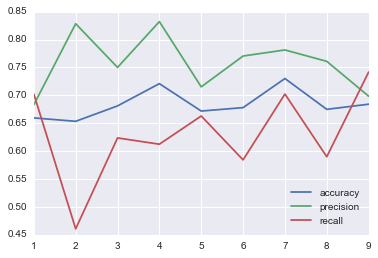

In [58]:
scores = []

for k in range(1,10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, np.ravel(y), test_size = 0.33, stratify=y)
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(X_train,y_train)
    predicted = knn.predict(X_test)
    knn_score = knn.score(X_test,y_test)
    
    rcs = recall_score(y_test, predicted)
    pcs = precision_score(y_test, predicted)
    acc = accuracy_score(y_test, predicted)
    
    tp, fn, fp, tn = np.ravel(confusion_matrix(y_test,predicted))
    
    scores.append({'k':k,
                 'recall':rcs,
                 'precision':pcs,
                 'accuracy': acc,
                 'true_p':tp,
                 'false_n':fn,
                 'false_p':fp,
                 'true_n':tn,
                 'score':knn_score})
my_df = pd.DataFrame(scores)
my_df.index = my_df[['k']]
my_df.plot(y=['accuracy','precision','recall'])
my_df.head()

### 7.  Can you think on any reasons changing this threashold is bad / good?

Find someone you've not talked with much in class then discuss this with them.  Seriously, get out and talk to someone you haven't talked with much.

In [ ]:
[change this cell to markdown type and write some notes here]

### 8. If you were a real-estate agent, and you wanted to minimize false positives, because you would lose money, what would you be trading off in terms of business value?

Discuss this with a few others as well and come up with at least 2 ideas that are actionable and optionally explore one of them through further analysis.

### Challenge #1:  Gridsearch + plot for an optimal value for K with KNN
Plot the value of K from Gridsearch params scored over the range to find an optimal value for K, for score.

> **Optionally**, can you find a configuration that minimizes false positives?  What is the tradeoff if so?

### Challenge #2:  Gridsearch optimal parameters for score for KNN
Can you find optimal parameters for KNN?  K will have the biggest impact, but you might be able to sqeeze a little bit more out using the other parameters.

### Challenge #3: Plot TP, FP, TN, FN in a single plot over a range of K

Manually plot a figure with 4 sub plots, 2x2, which plots the the range of K, by these 4 metrics.  Iterate through a range of K, from 1, 50 by steps of 2, fitting and scoring your classification through confusion matrix.

ASCII prototype:

```
|----------------- figure 1 -------------------|
|                      |                       |
|  [TP line plot #1]   |   [FP line graph #1]  |
|                      |                       |
|----------------------|-----------------------|
|                      |                       |
|  [TN line plot #1]   |   [FN line graph #1]  |
|                      |                       |
------------------------------------------------

```